In [21]:
from torchtext import datasets
import pandas as pd
import spacy
from torch.utils.data import DataLoader, Dataset
from collections import Counter
from torchtext.vocab import Vocab, FastText
import torch
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from torchtext.datasets import AmazonReviewFull

In [40]:
from torchtext.datasets import AmazonReviewFull
train, test = AmazonReviewFull()

ModuleNotFoundError: Package `torchdata` not found. Please install following instructions at `https://github.com/pytorch/data`

In [4]:
# loading train data

# train_df = pd.read_csv(".data/Amazon/3000test.csv", nrows=3000, header=0, index_col=0)
# train_df.head()



,0,1,2
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ..."
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,2,Oh dear,I was excited to find a book ostensibly about ...
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."


In [6]:
# # rename columns
# train_df.rename({'0':"star", '1':"rating1", '2':"rating2"}, axis=1, inplace=True)

# # merge the two reviews columns
# train_df["review"] = train_df["review"] = train_df["rating1"] + " " +  train_df["rating2"]

# # drop unnecessary columns
# train_df.drop(columns=["rating1", "rating2"], inplace=True)


In [8]:
train_df.head()

,star,review
0,1,mens ultrasheer This model may be ok for seden...
1,4,Surprisingly delightful This is a fast read fi...
2,2,"Works, but not as advertised I bought one of t..."
3,2,Oh dear I was excited to find a book ostensibl...
4,2,"Incorrect disc! I am a big JVC fan, but I do n..."


In [9]:
# test_df = pd.read_csv(".data/Amazon/3000test.csv", nrows=3000, header=0, index_col=0)
# test_df.head()

,0,1,2
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ..."
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,2,Oh dear,I was excited to find a book ostensibly about ...
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."


In [10]:
# # rename columns
# test_df.rename({'0':"star", '1':"rating1", '2':"rating2"}, axis=1, inplace=True)

# # merge the two reviews columns
# test_df["review"] = test_df["review"] = test_df["rating1"] + " " +  test_df["rating2"]

# # drop unnecessary columns
# test_df.drop(columns=["rating1", "rating2"], inplace=True)

In [11]:
# test_df.head()

,star,review
0,1,mens ultrasheer This model may be ok for seden...
1,4,Surprisingly delightful This is a fast read fi...
2,2,"Works, but not as advertised I bought one of t..."
3,2,Oh dear I was excited to find a book ostensibl...
4,2,"Incorrect disc! I am a big JVC fan, but I do n..."


In [25]:
# take a sample of training data

# train_df = train_df.groupby('star', group_keys=False).apply(lambda x: x.sample(100))

In [26]:
# train_df

,star,review
1632,1,great american spice company stay away from Gr...
142,1,"Actually, this book is not worth one star. Thi..."
1779,1,Please dont buy if you are entirely new to Jav...
1917,1,Defective Product The product was delivered on...
1643,1,blleeuurrgghhhh i have listened to this single...
...,...,...
1930,5,WHY IS THIS NOT AVAILABLE IN WIDESCREEN???? Th...
1238,5,This is a fantastic show. There's really nothi...
2960,5,Use as a chair I'm glad I bought the largest o...
1884,5,Great gift and a very useful item I purchased ...


In [20]:
# sample test_df

# test_df = test_df.groupby('star', group_keys=False).apply(lambda x: x.sample(200))



In [21]:
# test_df

,star,review
2359,1,OMG this is so awful how can you people listen...
596,1,Another person who can't believe they changed ...
846,1,Stained after two uses I bought these. After t...
956,1,Ripoff ! Don't Buy From CMMA Accessories ! I r...
287,1,Piece of CR--AP - try calling their support ! ...
...,...,...
1522,5,A Scholarly Book for Serious Students of Yiddi...
1948,5,Great product for the price Have been buying d...
2436,5,Rare Glow Fribee Delivered Fast I live in a sm...
2514,5,Of Mice and Men George and Lennie are best fri...


In [27]:
# nlp = spacy.load("en_core_web_sm")

In [28]:
# def preprocessing(sentence):
#     """
#     params sentence: a str containing the sentence we want to preprocess
#     return the tokens list
#     """
#     doc = nlp(sentence)
#     tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
#     return tokens

In [31]:
# class TrainData(Dataset):
#     # initiate the class with df and maximum number of tokens as argument
#     def __init__(self, df, max_seq_len=32):
#         self.max_seq_len = max_seq_len
#         counter = Counter()    # instanziate counter
#         train_iter = iter(df.review.values)    # make the review column iterable
#         for text in train_iter:
#             counter.update(preprocessing(text))    # update the counter object with the number of words and occurrencies
#         self.vocab = Vocab(counter, min_freq=1)    # create pytorch Vocab from the counter with all the words (min_freq=1)
#         self.vocab.load_vectors("fasttext.simple.300d")    # load pretrained embeddings
#         label_pipeline = lambda x: int(x) -1     # make the label range 0-4 instead of 1-5
#         self.token2idx = lambda x: self.vocab[x]  # Converts token to index
#         self.idx2token = lambda x: self.vocab.itos[int(x)]   # converts index to token
#         self.encode = lambda x:[self.token2idx(token) for token in preprocessing(x)]    # encode every token with its index
#         self.pad = lambda x: x + (max_seq_len - len(x)) * [self.token2idx("<pad>")]     # add the index of "<pad>" as many time as needed to reach max_seq_len
#         sequences = [self.encode(sequence)[:max_seq_len] for sequence in df.review.tolist()]    # truncate the sequence if it's longer than max_seq_len
#         sequence, self.labels = zip(*[(sequence, label_pipeline(label)) for sequence, label in zip(sequences, df.star.tolist()) if sequence]) # map every sequence to its label
#         self.sequences = [self.pad(sequence) for sequence in sequences]

#     # mandatory methods for custom dataloader
#     def __len__(self):
#         return len(self.sequences)

#     def __getitem__(self, i):
#         assert len(self.sequences[i]) == self.max_seq_len
#         return self.sequences[i], self.labels[i]

In [36]:
# train_dataset = TrainData(train_df, max_seq_len=32)

TypeError: __init__() got an unexpected keyword argument 'min_freq'

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
fasttext = FastText("simple")

In [7]:
def load_data(path):
    df = pd.read_csv(path, header=None, nrows=3000, skiprows=1, usecols=[1,2,3])
    df.rename({1: 'star', 2: 'rating1', 3: 'rating2'}, axis=1, inplace=True)
    df['review'] = df['rating1'] + ' ' + df['rating2']
    df.drop(columns=['rating1', 'rating2'], inplace=True)
    return df


In [9]:
def train_test_split(df, train_size=0.8):
    df_idx = [i for i in range(len(df))]
    np.random.shuffle(df_idx)
    len_train = int(len(df) * train_size)
    df_train = df.iloc[:len_train].reset_index(drop=True)
    df_test = df.iloc[len_train:].reset_index(drop=True)
    return df_train, df_test



In [10]:
def preprocessing(sentence):
    """
    Get rid of special symbols, lower case the words.
    return token list
    """
    doc = nlp(sentence)
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    return tokens



In [11]:
def token_encoder(token, vec):
    if token == "<pad>":
        return 1
    else:
        try:
            return vec.stoi[token]
        except:
            return 0

In [12]:
def encoder(tokens, vec):
    return [token_encoder(token, vec) for token in tokens]



In [13]:
def padding(list_of_idx, max_seq_len, padding_index=1):
    output = list_of_idx + (max_seq_len - len(list_of_idx))*[padding_index]
    return output[:max_seq_len]



In [14]:
class TrainData(Dataset):
    def __init__(self, df, max_seq_len=32): # df is the input df, max_seq_len is the max lenght allowed to a sentence before cutting or padding
        self.max_seq_len = max_seq_len
        
        counter = Counter()
        train_iter = iter(df.review.values)
        self.vec = FastText("simple")
        self.vec.vectors[1] = -torch.ones(self.vec.vectors[1].shape[0]) # replacing the vector associated with 1 (padded value) to become a vector of -1.
        self.vec.vectors[0] = torch.zeros(self.vec.vectors[0].shape[0]) # replacing the vector associated with 0 (unknown) to become zeros
        self.vectorizer = lambda x: self.vec.vectors[x]
        self.labels = df.star
        sequences = [padding(encoder(preprocessing(sequence), self.vec), max_seq_len) for sequence in df.review.tolist()]
        self.sequences = sequences
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, i):
        assert len(self.sequences[i]) == self.max_seq_len
        return self.sequences[i], self.labels[i]

In [15]:
BATCH_SIZE = 32
df = load_data('.data/Amazon/3000test.csv')
df.star = df.star.apply(lambda x: int(x) -1)

train_df, test_df = train_test_split(df)
train_df, test_df = TrainData(train_df), TrainData(test_df)
df.star.unique()



array([0, 3, 1, 2, 4], dtype=int64)

In [16]:
def collate_train(batch, vectorizer=train_df.vectorizer):
    inputs = torch.stack([torch.stack([vectorizer(token) for token in sentence[0]]) for sentence in batch])
    target = torch.LongTensor([item[1] for item in batch])
    return inputs, target

def collate_test(batch, vectorizer=test_df.vectorizer):
    inputs = torch.stack([torch.stack([vectorizer(token) for token in sentence[0]]) for sentence in batch])
    target = torch.LongTensor([item[1] for item in batch])
    return inputs, target

In [17]:
train_loader = DataLoader(train_df, batch_size=BATCH_SIZE, collate_fn=collate_train, shuffle=True)
test_loader = DataLoader(test_df, batch_size=BATCH_SIZE, collate_fn=collate_test)

In [18]:
from torch import nn
import torch.nn.functional as F
emb_dim = 300
class Classifier(nn.Module):
    def __init__(self, max_seq_len, emb_dim, hidden1=16, hidden2=16):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(max_seq_len*emb_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 5)
        self.out = nn.LogSoftmax(dim=1)
    
    
    def forward(self, inputs):
        x = F.relu(self.fc1(inputs.squeeze(1).float()))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return self.out(x)

In [19]:
MAX_SEQ_LEN = 32
model = Classifier(MAX_SEQ_LEN, 300, 16, 16)
model

Classifier(
  (fc1): Linear(in_features=9600, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=5, bias=True)
  (out): LogSoftmax(dim=1)
)

In [20]:
from torch import optim
criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.parameters(), lr=0.003)

Epoch: 1/100, Train loss: 1.6479, Test loss: 1.6320, Accuracy: 0.1552
Epoch: 2/100, Train loss: 1.5731, Test loss: 1.6052, Accuracy: 0.2122
Epoch: 3/100, Train loss: 1.4257, Test loss: 1.6084, Accuracy: 0.2599
Epoch: 4/100, Train loss: 1.1419, Test loss: 1.8773, Accuracy: 0.2719
Epoch: 5/100, Train loss: 0.9189, Test loss: 2.2688, Accuracy: 0.2610
Epoch: 6/100, Train loss: 0.8283, Test loss: 2.5315, Accuracy: 0.2237
Epoch: 7/100, Train loss: 0.7864, Test loss: 2.7323, Accuracy: 0.2484
Epoch: 8/100, Train loss: 0.7664, Test loss: 2.8125, Accuracy: 0.2654
Epoch: 9/100, Train loss: 0.7615, Test loss: 2.9639, Accuracy: 0.2489
Epoch: 10/100, Train loss: 0.7504, Test loss: 3.0427, Accuracy: 0.2133
Epoch: 11/100, Train loss: 0.7463, Test loss: 3.0845, Accuracy: 0.2319
Epoch: 12/100, Train loss: 0.7418, Test loss: 3.2442, Accuracy: 0.2122
Epoch: 13/100, Train loss: 0.7411, Test loss: 3.3576, Accuracy: 0.2012
Epoch: 14/100, Train loss: 0.7376, Test loss: 3.4967, Accuracy: 0.2177
Epoch: 15/100, 

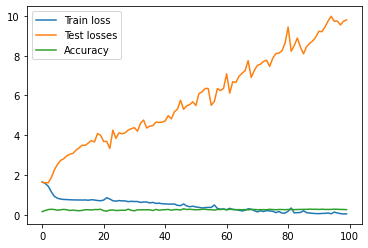

In [22]:
epochs = 100
print_every = 40
train_losses, test_losses, accuracies = [], [], []

for e in range(epochs):
    running_loss, running_test_losses, running_test_accuracy = 0, 0, 0
    # print(f"Epoch: {e+1}/{epochs}")

    for i, (sentences, labels) in enumerate(iter(train_loader)):

        sentences.resize_(sentences.size()[0], 32* emb_dim)
        
        optimizer.zero_grad()
        
        output = model.forward(sentences)   # 1) Forward pass
        train_loss = criterion(output, labels) # 2) Compute loss
        train_loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += train_loss.item()
        
        # if i % print_every == 0:
        #     print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
        #     running_loss = 0
    avg_running_loss = running_loss/len(train_loader)
    train_losses.append(avg_running_loss)

    model.eval()
    with torch.no_grad():
        for i, (sentences_test, labels_test) in enumerate(iter(test_loader)):
            sentences_test.resize_(sentences_test.size()[0], 32* emb_dim)

            output_test = model.forward(sentences_test)
            test_loss = criterion(output_test, labels_test)

            running_test_losses += test_loss.item()

            prediction_label = torch.argmax(output_test, dim=1)
            running_test_accuracy += (prediction_label == labels_test).sum() / len(labels_test)
        avg_test_loss = running_test_losses/len(test_loader)
        test_losses.append(avg_test_loss)
        avg_running_accuracy = running_test_accuracy/len(test_loader)
        accuracies.append(avg_running_accuracy)

    model.train()

    print(f"Epoch: {e+1}/{epochs}, Train loss: {avg_running_loss:.4f}, Test loss: {avg_test_loss:.4f}, Accuracy: {avg_running_accuracy:.4f}" )

torch.save({'model_state': model.state_dict()}, 'final_model')
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test losses')
plt.plot(accuracies, label='Accuracy')
plt.legend()
plt.show()